# Artificial Neural Networks AM41AN

## Week 3 Binary Perceptron - Hebb's algorithm

## Task 1

Consider the vector $\langle\boldsymbol{B}\,|=(1,1,\dots,1)$ with $\langle\boldsymbol{B}\,|\boldsymbol{B}\,\rangle=N$. Device a function that generates vectors $|\boldsymbol{x}\rangle\in\{\pm1\}^{N}$ drawn from a homogeneous distribution, and classify them with the rule $t=\mathrm{sgn}\left(\langle\boldsymbol{B}\,|\boldsymbol{x}\rangle\right)$.



In [1]:
##############
### Task 1 ###
##############

import numpy as np                              # Imports the libraries
def datum(N):                                   # datum(N) generates a random binary vector of dimension N and its classification.
    vec = 1 - 2 * np.random.randint(0,2,size=N) # Creates an array in {+-}^N
    sig = np.sign(sum(vec))                     # and its classification
    return(vec,sig)                         
datum(15)


(array([-1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1]), -1)

## Task 2
Implement the Hebb learning algorithm:
$$
|\boldsymbol{w}_{n+1}\rangle|=\boldsymbol{w}_{n}\rangle+\frac{t_n|\boldsymbol{x}_n\rangle}{\sqrt{N}}.
$$

Then compute the histograms of the different components of the aligning field $\phi$:
$$
\phi_m=\frac{t_m\langle \boldsymbol{w}_M|\boldsymbol{x}_m\rangle}{\sqrt{N}}\\
\phi_m=1+\sqrt{\frac{2}{\pi}}\alpha|z|+\sqrt{\alpha}y,
$$
where $\alpha=M/N$ and $y,z\sim\mathcal{N}(\cdot|0,1)$.
With the histogram in $\phi$ compute the training error.


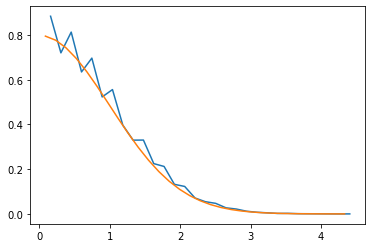

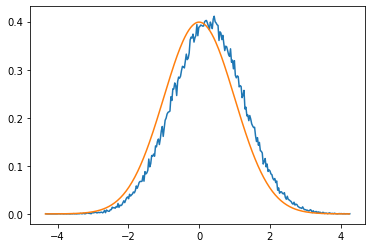

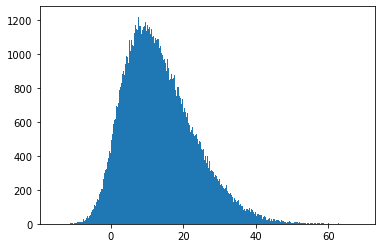

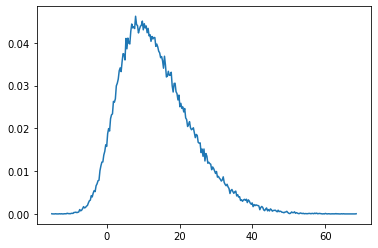

0.1674713451965232


In [32]:
############
### Task 2 # 
############

import math
import matplotlib.pyplot as plt

def gauss(x,mu,sigma):                                                     # Returns the normal probability density at mu with std sigma at x
    return np.exp(-(x-mu)**2/2/sigma**2) / np.sqrt(2 * math.pi * sigma**2)

def hebb(N,M):                                               # 
    wo = np.zeros(N)
    wn = np.zeros(N)
    sn = 1 / np.sqrt(N)
    bb = sn * np.ones(N)
    tp = np.sqrt(2 / math.pi)
    al = M / N
    cpar = tp * al
    cper = np.sqrt(al)
    Bins = math.ceil(np.sqrt(M))
    lx = []
    lt = []
    for i in range(M):
        x , t = datum(N)
        lx.append(x)
        lt.append(t)
        wn = wo + sn * t * x
        wo = wn
    fpar = []
    fper = []
    fphi = []
    wpar = np.dot(bb,wn) * bb
    wper = wn - wpar
    for i in range(M):
        x = lx[i]
        t = lt[i]
        xpar = t * sn * np.dot(bb,x) * bb
        xper = t * sn * x - xpar
        vpar = wpar - xpar
        vper = wper - vpar
        rpar = np.dot(xpar,vpar)
        rper = np.dot(xper,vper)
        fpar.append(rpar / cpar)
        fper.append(rper / cper)
        fphi.append(1 + rpar + rper)
    kpar , lpar = np.histogram(fpar , bins = min(30,Bins))     # counts and position of the bins from the histogram of zz
    mpar        = (lpar[1:] + lpar[:-1]) / 2                   # mid point between consecutive bins
    apar = sum(kpar) * (lpar[1] - lpar[0])
    kper , lper = np.histogram(fper , bins = Bins)             # counts and position of the bins from the histogram of zz
    mper        = (lper[1:] + lper[:-1]) / 2                   # mid point between consecutive bins
    aper = sum(kper) * (lper[1] - lper[0])
    kphi , lphi = np.histogram(fphi , bins = Bins)             # counts and position of the bins from the histogram of zz
    mphi        = (lphi[1:] + lphi[:-1]) / 2                   # mid point between consecutive bins
    aphi = sum(kphi) * (lphi[1] - lphi[0])
    
    plt.plot(lpar[1:],kpar / apar);
    plt.plot(mpar,2 * gauss(mpar,0,1))
    plt.show()
    plt.plot(lper[1:],kper / aper)
    plt.plot(mper,gauss(mper,0,1))
    plt.show()
    plt.hist(fphi,Bins)
    plt.show()
    plt.plot(lphi[1:],kphi / aphi)
    plt.show()
    
    er = 0
    for i in range(len(lphi[1:])):
        if lphi[i + 1] < 0:
            er = er + kphi[i]
    print(er / aphi)
hebb(5501,100000)        



## Task 3

Compute a generalization error curve.

In [52]:
def ge(N,M,L1,L2):                                               # 
    
    sn = 1 / np.sqrt(N)
    error = np.zeros(M)
    erro2 = np.zeros(M)
    for l1 in range(L1):
        Error = np.zeros(M)
        Erro2 = np.zeros(M)
        for l2 in range(L2):
            w = np.zeros(N)
            for i in range(M):
                x , t = datum(N)
                r = np.heaviside(-1 * t * np.dot(w,x) , 0.5)
                Error[i] = Error[i] + r
                Erro2[i] = Erro2[i] + r * r
                w = w + sn * t * x
        Error = Error / L2
        Erro2 = Erro2 / L2
        for i in range(M):
            Erro2[i] = np.abs(Erro2[i] - Error[i] ** 2 )
        error = error + Error
        erro2 = erro2 + Erro2
    error = error / L1
    erro2 = np.sqrt(erro2 / (L1 * (L1 - 1)))
    xx = np.zeros(M)
    yy = np.zeros(M)
    for i in range(M):
        xx[i] = i / N
        yy[i] = math.acos(np.sqrt(2 * xx[i] / (2 * xx[i] + math.pi))) / math.pi
         
    plt.plot(xx,error - erro2)
    plt.plot(xx,error)
    plt.plot(xx,error + erro2)
    plt.plot(xx,yy)
    plt.show()
      


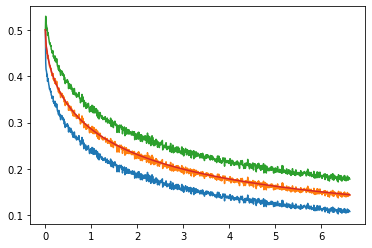

In [57]:
ge(151,1000,100,100) 

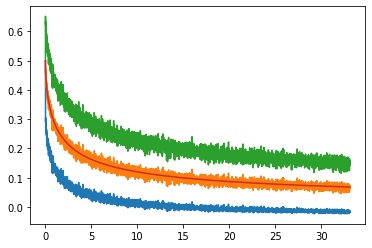

In [55]:
ge(151,5000,10,100) 